
# Diseño de software

----

## Structural Pattern Matching (Match Statement)

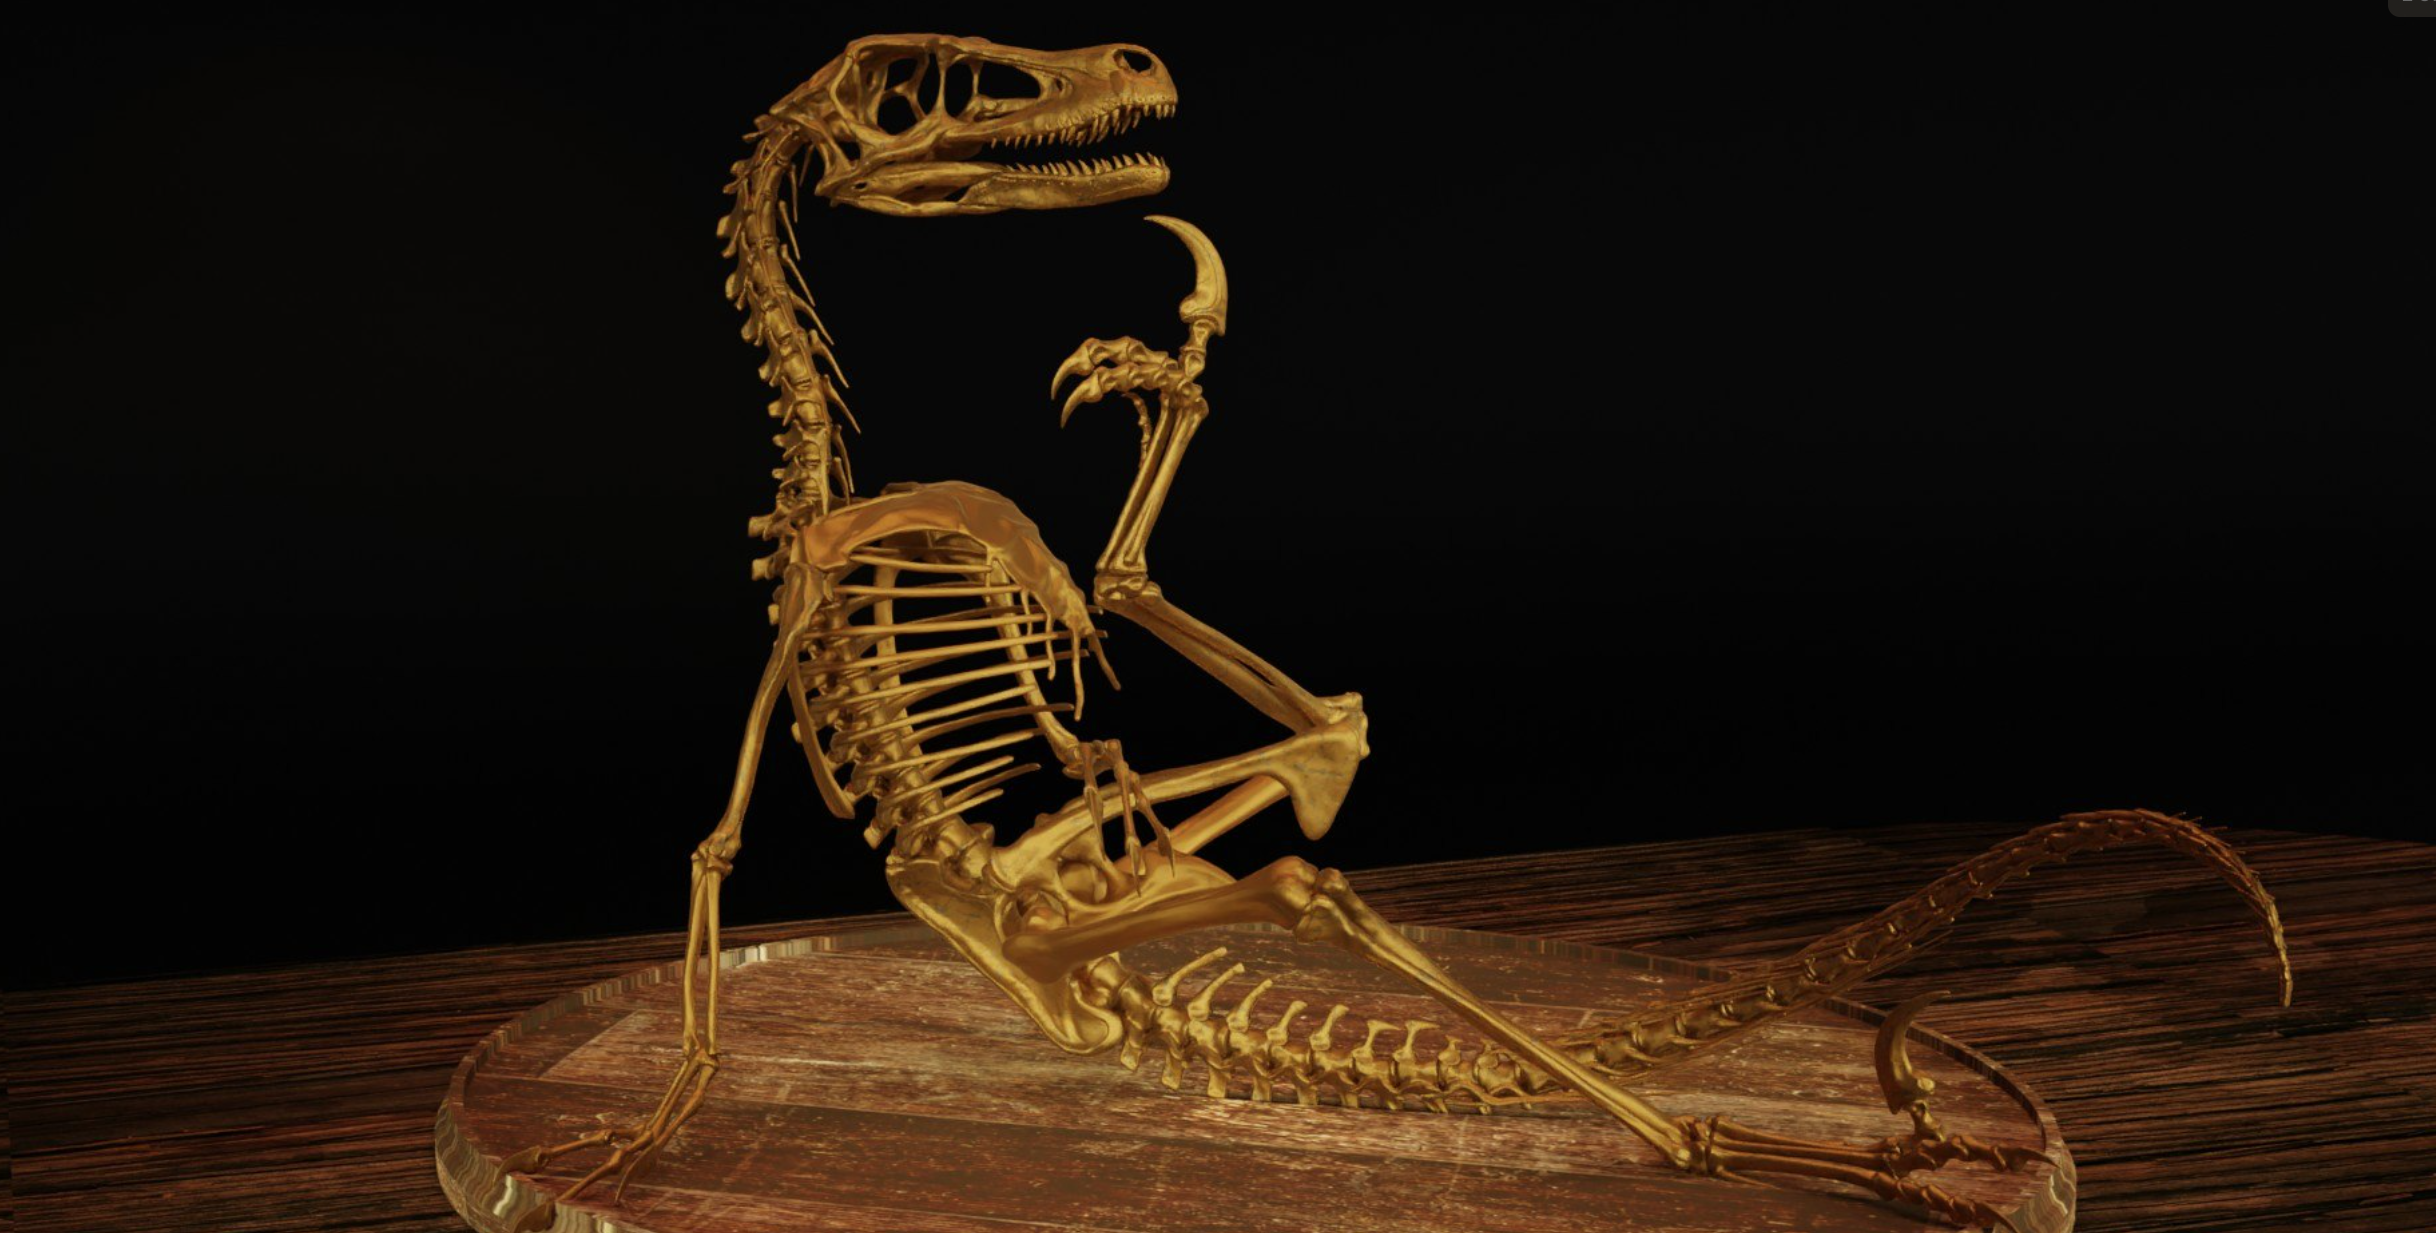

## Introducción

Algo parecido al reconocimiento de patrones ya existe en Python <= 3.9, pero es muy básico. Por ejemplo:

In [1]:
x, *y, z = 1, 2, 3, 4, 5, 6
x, y, z

(1, [2, 3, 4, 5], 6)

A partir de Python 3.10 se introduce el statement **`match`**, permitiendo mayor flexibilidad y poder en el reconocimiento de patrones.

Es similar al **`switch`** statement de lenguajes como C/C++, C# y Java.

La gran diferencia es que el **switch** solo chequea igualdad, mientras que el **match** reconoce la estructura subyacente del objeto.

## Ejemplo 1

In [2]:
def match_errno(errno):
    match errno:
        case 0:
            pass
        case 1:
            pass
        case 42:
            print("42!")
        case _:
            print("wildcard")

In [3]:
match_errno(42)

42!


## Ejemplo 1: *The old way*

In [4]:
def match_errno(errno):
    if errno == 0:
        pass
    elif errno == 1:
        pass
    elif errno == 42:
        print("42!")
    else:
        print("wildcard")

In [5]:
match_errno(42)

42!


## Interlude: Switch y por que en este caso aun nos conviene el if

- En la mayoria de los lenguajes `switch` es una forma de abreviar el `if else`.
- Originalmente solo aceptaba comparación contra literales.
- Lenguajes mas modernos (o actualizados) soportan expresiones(C#, C/C++) y son más parecidos al Pattern matching.
- Scala/Python directamente nunca tuvieron un `switch` y fueron directo al `match`.

## `switch` puro: Java vs Python

```java
// 36 caracteres de (switch-case-default-break)
int a = 1;
switch(a):
    case 1:
        System.out.println("One"); break;
    case 2:
        System.out.println("Two"); break;
    default:
        System.out.println("not 1, not 2"); break;
```

In [6]:
## 10 caracteres de if-elif-else
a = 1
if a == 1:
    print("One")
elif 2:
    print("Two")
else:
    print("not 1, not 2")

One


## Ejemplo 2

In [7]:
def command_split(command):
    match command.split():
        case ["make"]:
            print("default make")
        case ["make", cmd]:
            print(f"make command found: {cmd}")
        case ["restart"]:
            print("restarting")
        case ["rm", *files]:
            print(f"deleting files: {files}")
        case _:
            print("didn't match")

In [8]:
command_split("make")

default make


In [9]:
command_split("make clean")

make command found: clean


In [10]:
command_split("restart")
#command_split("rm a b c")
#command_split("doesnt match")

restarting


## Ejemplo 2: *The old way*

In [11]:
def command_split(command):
    commands = command.split()
    if commands == ["make"]:
        print("default make")
    elif len(commands) == 2 and commands[0] == "make":
        cmd = commands[1]
        print(f"make command found: {cmd}")
    elif commands == ["restart"]:
        print("restarting")
    elif len(commands) >= 1 and commands[0] == "rm":
        files = commands[1:]
        print(f"deleting files: {files}")
    else:
        print("didn't match")

In [12]:
command_split("make")
#command_split("make clean")
#command_split("restart")
#command_split("rm a b c")
#command_split("doesnt match")

default make


## Ejemplo 3

In [13]:
def match_alternatives(command):
    match command.split():
        case ["north"] | ["go", "north"]:
            print("going north")
        case ["get", obj] | ["pick", "up", obj] | ["pick", obj, "up"]:
            print(f"picking up: {obj}")

In [14]:
match_alternatives("go north")

going north


In [15]:
match_alternatives("pick up sword")

picking up: sword


## Ejemplo 3: *The old way*

In [16]:
def match_alternatives(command):
    commands = command.split()
    if commands == ["north"] or commands == ["go", "north"]:
        print("going north")
    elif len(commands) == 2 and commands[0] == "get":
        obj = commands[1]
        print(f"picking up: {obj}")
    elif len(commands) == 3 and commands[0:2] == ["pick", "up"]:
        obj = commands[2]
        print(f"picking up: {obj}")
    elif len(commands) == 3 and commands[0] == "pick" and commands[2] == "up":
        obj = commands[1]
        print(f"picking up: {obj}")

In [17]:
match_alternatives("go north")
#match_alternatives("pick up sword")

going north


## Ejemplo 4

In [18]:
def match_capture_subpattern(command):
    match command.split():
        case ["go", ("north" | "south" | "east" | "west") as direction]:
            print(f"going {direction}")

In [19]:
match_capture_subpattern("go north")
#match_capture_subpattern("go east")

going north


## Ejemplo 4: *The old way*

In [20]:
def match_capture_subpattern(command):
    commands = command.split()
    if len(commands) == 2 and commands[0] == "go" and commands[1] in {"north", "south", "east", "west"}:
        direction = commands[1]
        print(f"going {direction}")

In [21]:
match_capture_subpattern("go north")
#match_capture_subpattern("go east")

going north


## Ejemplo 5

In [22]:
def match_guard(command, exits):
    match command.split():
        case ["go", direction] if direction in exits:
            print(f"going {direction}")
        case ["go", _]:
            print(f"can't go that way")

In [23]:
match_guard("go north", exits=["east", "south"])
#match_guard("go north", exits=["north"])

can't go that way


## Ejemplo 5: *The old way*

In [24]:
def match_guard(command, exits):
    commands = command.split()
    if len(commands) == 2 and commands[0] == "go" and commands[1] in exits:
        direction = commands[1]
        print(f"going {direction}")
    elif len(commands) == 2 and commands[0] == "go":
        print(f"can't go that way")

In [25]:
match_guard("go north", exits=["east", "south"])
#match_guard("go north", exits=["north"])

can't go that way


## Ejemplo 6

In [26]:
from dataclasses import dataclass

@dataclass
class Click:
    position: tuple[int, int]
    button: str

@dataclass
class KeyPress:
    key_name: str

@dataclass
class Quit:
    pass

## Ejemplo 6

In [27]:
def match_by_class(event):
    match event:
        case Click(position=(x,y), button="left"):
            print(f"handling left click at {x,y}")
        case Click(position=(x,y)):
            print(f"handling other click at {x,y}")
        case KeyPress("Q"|"q") | Quit():
            print("quitting")
        case KeyPress(key_name="up arrow"):
            print("going up")
        case KeyPress():
            pass #ignore other keystrokes
        case other_event:
            raise ValueError(f'unrecognized event: {other_event}')

In [28]:
match_by_class(Click(position=(0,0), button="left"))
#match_by_class(Quit())

handling left click at (0, 0)


In [29]:
try:
    match_by_class("BADVALUE")
except ValueError:
    pass

## Ejemplo 6: *The old way*

In [30]:
def match_by_class(event):
    if isinstance(event, Click) and event.button == "left":
        x,y = event.position
        print(f"handling left click at {x, y}")
    elif isinstance(event, Click):
        x,y = event.position
        print(f"handling other click at {x, y}")
    elif isinstance(event, KeyPress) and event.key_name in ["Q","q"] \
            or isinstance(event, Quit):
        print("quitting")
    elif isinstance(event, KeyPress) and event.key_name == "up arrow":
        print("going up")
    elif isinstance(event, KeyPress):
        pass
    else:
        raise ValueError(f'unrecognized event: {event}')

In [31]:
match_by_class(Click(position=(0,0), button="left"))
#match_by_class(Quit())

handling left click at (0, 0)


In [32]:
try:
    match_by_class("BADVALUE")
except ValueError:
    pass

## Ejemplo 7

In [33]:
def match_json_event(event):
    match event:
        case {"transport": "http"}:
            print("insecure event ignored")
        case {"verb": "GET", "page": "articles", "pageno": n}:
            print(f"let me get that article for you on page {n}...")
        case {"verb": "POST", "page": "signup"}:
            print("handling signup")

In [34]:
match_json_event({"verb": "GET", "page": "articles", "pageno": 5, "info": "extra"})

let me get that article for you on page 5...


## Ejemplo 7: *The old way*

In [35]:
def match_json_event(event):
    if event.get("transport") == "http":
        print("insecure event ignored")
    elif event.get("verb") == "GET" and event.get("page") == "articles" and "pageno" in event:
        n = event["pageno"]
        print(f"let me get that article for you on page {n}...")
    elif event.get("verb") == "POST" and event.get("page") == "signup":
        print("handling signup")

In [36]:
match_json_event({"verb": "GET", "page": "articles", "pageno": 5, "info": "extra"})

let me get that article for you on page 5...


## Programación lógica

- Logic programming is a programming paradigm which is largely based on formal logic.
- En vez de dividir los programas entre "control" y "datos", solo ofrece datos.
- Los datos *generalmente* son de dos tipos: facts (hechos) y rules.
- El lenguaje mas popular es la familia Prolog (programmation en logique)
- El lenguaje solo puede responder *yes* o *no* a una pregunta.
- No hay un concepto de orden entre las ejecuciones.
- Es un gran gran gran pattern matching.
- El mayor uso del lenguaje son los llamados "sistemas expertos".

```pl
human(socrates).
mortal(X) :- human(X).
```

## Swi-Prolog (https://www.swi-prolog.org/)

- De todas las implementaciones de prolog esta suele ser la mas popular.
- Tiene interfazes con todos los lenguajes https://github.com/yuce/pyswip
- Una implementacion en swi-prolog puede correr en varios nodos naturalmente.
- Es licencia BSD.

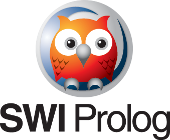

##  Bases de conocimiento

- Todo el conocimiento se ordena en un único archivo de reglas y hechos llamado knowledge-base.
- Los hechos y reglas van en minuscula.
- el **`.`** (punto) termina una regla o un hecho.
- La **`,`** es un *and* y el **`;`** es un *or*.
- El operador **`:-`** se lee como *"if"* o *"implica-que"*.
- Una regla es un un conjunto de disyunciones y conjunciones logicas, entre hechos u otras reglas.

In [2]:
!batcat prolog/db.pl --theme GitHub -p

man(adam).
man(peter).
man(paul).

woman(marry).
woman(eve).

parent(adam, peter).
parent(eve, peter).
parent(adam, paul).
parent(marry, paul).


father(F, C) :- man(F), parent(F, C).
mother(M, C) :- woman(M), parent(M, C).




### Referencias

https://www.youtube.com/watch?v=-79HGfWmH_w

https://github.com/mCodingLLC/VideosSampleCode